In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
data_name = 'pbmc_subset'
data_type = "normalized"

# Freeze Level=0 scores

In [4]:
ks = [15, 25, 50, 100, 200, 300]

In [5]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'KNN_{k}' for k in ks] + [f'EBM_{k}' for k in ks]

In [6]:
freezed0_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=0_{data_type}_{i}_mmd.log", header=None) for i in range(5)]
freezed0_scnet_count_df = pd.concat(freezed0_scnet_count_df)
freezed0_scnet_count_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.077501,0.379994,0.531283,0.618313,0.593997,0.542398,0.477487,0.419153,0.385950,0.387438,0.416553,0.446109,0.477540,0.513879,0.537929
1,0.8,0.076296,0.373056,0.528984,0.597058,0.573382,0.514409,0.451375,0.396213,0.362154,0.397135,0.426616,0.459650,0.495160,0.533195,0.557094
2,0.6,0.084271,0.372510,0.522208,0.585054,0.542645,0.479663,0.422407,0.365040,0.329406,0.394557,0.425007,0.462918,0.499907,0.538629,0.562957
3,0.4,0.063400,0.387453,0.539312,0.566804,0.521252,0.453905,0.394998,0.332861,0.290970,0.449053,0.484020,0.522037,0.556870,0.595080,0.618514
4,0.2,0.068766,0.369659,0.528403,0.493692,0.443435,0.384813,0.324239,0.249986,0.205341,0.449923,0.487704,0.529967,0.581859,0.632471,0.657766


In [7]:
freezed0_scnet_count_df.columns = columns

In [8]:
freezed0_scnet_scores = freezed0_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [9]:
freezed0_scnet_scores 

,subsample fraction,ASW,ARI,NMI,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300
0,0.1,0.072053,0.350236,0.531578,0.415803,0.375350,0.316117,0.247712,0.177420,0.138478,0.489071,0.527460,0.576633,0.623660,0.667825,0.688193
1,0.2,0.078527,0.377182,0.517980,0.470652,0.428055,0.373937,0.315434,0.245753,0.203671,0.432546,0.468599,0.515467,0.565560,0.618288,0.647534
2,0.4,0.067368,0.381847,0.533095,0.555322,0.508891,0.444332,0.387083,0.326657,0.285696,0.442935,0.474226,0.511381,0.547329,0.585810,0.610135
3,0.6,0.078571,0.372439,0.524104,0.576416,0.543784,0.478950,0.420727,0.364223,0.328156,0.398826,0.429355,0.466817,0.503325,0.543326,0.569196
4,0.8,0.076826,0.381800,0.534129,0.591841,0.568172,0.511885,0.450582,0.394724,0.360552,0.395408,0.423809,0.458658,0.494082,0.531222,0.555560
5,1.0,0.077559,0.378210,0.531162,0.619391,0.592655,0.541194,0.474811,0.417021,0.383970,0.380467,0.409247,0.442317,0.476119,0.513082,0.537314


In [68]:
freezed0_scnet_scores['Architecture'] = 'FreezeLevel=0 scNet '

In [69]:
freezed0_scnet_scores

,subsample fraction,ASW,ARI,NMI,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,Architecture
0,0.1,0.072053,0.350236,0.531578,0.415803,0.375350,0.316117,0.247712,0.177420,0.138478,0.489071,0.527460,0.576633,0.623660,0.667825,0.688193,FreezeLevel=0 scNet
1,0.2,0.078527,0.377182,0.517980,0.470652,0.428055,0.373937,0.315434,0.245753,0.203671,0.432546,0.468599,0.515467,0.565560,0.618288,0.647534,FreezeLevel=0 scNet
2,0.4,0.067368,0.381847,0.533095,0.555322,0.508891,0.444332,0.387083,0.326657,0.285696,0.442935,0.474226,0.511381,0.547329,0.585810,0.610135,FreezeLevel=0 scNet
3,0.6,0.078571,0.372439,0.524104,0.576416,0.543784,0.478950,0.420727,0.364223,0.328156,0.398826,0.429355,0.466817,0.503325,0.543326,0.569196,FreezeLevel=0 scNet
4,0.8,0.076826,0.381800,0.534129,0.591841,0.568172,0.511885,0.450582,0.394724,0.360552,0.395408,0.423809,0.458658,0.494082,0.531222,0.555560,FreezeLevel=0 scNet
5,1.0,0.077559,0.378210,0.531162,0.619391,0.592655,0.541194,0.474811,0.417021,0.383970,0.380467,0.409247,0.442317,0.476119,0.513082,0.537314,FreezeLevel=0 scNet


# Freeze Level=1 scores

In [12]:
freezed1_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=1_{data_type}_{i}_mmd.log", header=None) for i in range(5)]
freezed1_scnet_count_df = pd.concat(freezed1_scnet_count_df)

In [13]:
freezed1_scnet_count_df.columns = columns

In [14]:
freezed1_scnet_scores = freezed1_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [70]:
freezed1_scnet_scores['Architecture'] = 'FreezeLevel=1 scNet '

In [71]:
freezed1_scnet_scores.head()

,subsample fraction,ASW,ARI,NMI,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,Architecture
0,0.1,0.071965,0.416949,0.560759,0.453408,0.412627,0.354567,0.273477,0.186836,0.141293,0.461722,0.501129,0.560847,0.620430,0.671472,0.688338,FreezeLevel=1 scNet
1,0.2,0.062185,0.391767,0.540799,0.499718,0.453149,0.400868,0.342457,0.262643,0.212330,0.436363,0.469560,0.516085,0.570565,0.628653,0.657208,FreezeLevel=1 scNet
2,0.4,0.070538,0.377932,0.535400,0.587822,0.538427,0.469955,0.412898,0.354532,0.309912,0.407118,0.437357,0.474650,0.514519,0.566082,0.597424,FreezeLevel=1 scNet
3,0.6,0.070251,0.375258,0.528253,0.603165,0.571314,0.501734,0.443450,0.389946,0.356051,0.394117,0.421055,0.456164,0.492402,0.537457,0.569692,FreezeLevel=1 scNet
4,0.8,0.071477,0.383076,0.532294,0.618549,0.597571,0.539085,0.473748,0.418154,0.385700,0.392858,0.418966,0.452786,0.484792,0.523162,0.550209,FreezeLevel=1 scNet


# Freeze Level=2 scores

In [17]:
freeze2_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=2_{data_type}_{i}_mmd.log", header=None) for i in range(5)]
freeze2_scnet_count_df = pd.concat(freeze2_scnet_count_df)

In [18]:
freeze2_scnet_count_df.columns = columns

In [19]:
freeze2_scnet_scores = freeze2_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [72]:
freeze2_scnet_scores['Architecture'] = 'FreezeLevel=2 scNet ' 

In [21]:
freeze2_scnet_scores.head()

,subsample fraction,ASW,ARI,NMI,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,Architecture
0,0.1,0.066405,0.419375,0.580380,0.458007,0.420536,0.366188,0.290501,0.195116,0.144033,0.503155,0.539008,0.583252,0.628336,0.669495,0.687332,FreezeLevel=2 scNet (MSE)
1,0.2,0.062821,0.387248,0.546367,0.489949,0.449542,0.399666,0.348265,0.273909,0.222147,0.466274,0.500045,0.540715,0.584424,0.632001,0.655677,FreezeLevel=2 scNet (MSE)
2,0.4,0.065367,0.404448,0.552855,0.569136,0.525057,0.463692,0.410766,0.355280,0.313633,0.449656,0.478881,0.511049,0.545350,0.585849,0.612401,FreezeLevel=2 scNet (MSE)
3,0.6,0.061398,0.410517,0.551815,0.586036,0.555265,0.492306,0.438440,0.388245,0.355351,0.451200,0.476760,0.507499,0.535616,0.569441,0.592440,FreezeLevel=2 scNet (MSE)
4,0.8,0.063271,0.403044,0.546367,0.595153,0.573637,0.521437,0.462177,0.410969,0.380512,0.444816,0.469053,0.498424,0.524772,0.555350,0.576129,FreezeLevel=2 scNet (MSE)


# scVI scores

In [22]:
scvi_scores = []
for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    scvi_scores.append(pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for j in range(5)]).mean())
scvi_scores_df = pd.DataFrame(scvi_scores)
scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
scvi_scores_df

,Epoch,Elapsed Time,ASW,NMI,ARI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,subsample fraction
0,299.0,5.889924,0.021176,0.435086,0.260607,0.579869,0.604720,0.643029,0.669004,0.686765,0.691852,0.362531,0.328051,0.276504,0.222862,0.166358,0.132235,0.1
1,299.0,9.987076,0.025305,0.469811,0.321881,0.540546,0.572203,0.603579,0.633652,0.664063,0.677022,0.441107,0.398021,0.341554,0.285908,0.227644,0.191831,0.2
2,299.0,19.998644,0.016439,0.476659,0.321007,0.545439,0.573635,0.603109,0.630417,0.654427,0.666518,0.493306,0.457236,0.397757,0.340612,0.284422,0.249943,0.4
3,299.0,29.817373,0.013121,0.457508,0.312142,0.541189,0.569100,0.601300,0.628540,0.652518,0.663519,0.488837,0.458410,0.404198,0.356186,0.307479,0.276958,0.6
4,299.0,40.182101,0.012255,0.499421,0.380013,0.545153,0.573081,0.603694,0.626483,0.646134,0.656806,0.505142,0.483213,0.436810,0.381574,0.329768,0.298731,0.8
5,299.0,50.491259,0.011170,0.482846,0.363819,0.536611,0.565421,0.591769,0.615923,0.640106,0.652550,0.520799,0.502161,0.461561,0.405941,0.352807,0.321342,1.0


In [23]:
# scvi_scores_df = pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]])
# scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

In [24]:
scvi_scores_df['Architecture'] = 'scVI'

In [25]:
scvi_scores_df.drop(['Elapsed Time', 'Epoch'], axis=1, inplace=True)

In [26]:
scvi_scores_df.head()

,ASW,NMI,ARI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,subsample fraction,Architecture
0,0.021176,0.435086,0.260607,0.579869,0.604720,0.643029,0.669004,0.686765,0.691852,0.362531,0.328051,0.276504,0.222862,0.166358,0.132235,0.1,scVI
1,0.025305,0.469811,0.321881,0.540546,0.572203,0.603579,0.633652,0.664063,0.677022,0.441107,0.398021,0.341554,0.285908,0.227644,0.191831,0.2,scVI
2,0.016439,0.476659,0.321007,0.545439,0.573635,0.603109,0.630417,0.654427,0.666518,0.493306,0.457236,0.397757,0.340612,0.284422,0.249943,0.4,scVI
3,0.013121,0.457508,0.312142,0.541189,0.569100,0.601300,0.628540,0.652518,0.663519,0.488837,0.458410,0.404198,0.356186,0.307479,0.276958,0.6,scVI
4,0.012255,0.499421,0.380013,0.545153,0.573081,0.603694,0.626483,0.646134,0.656806,0.505142,0.483213,0.436810,0.381574,0.329768,0.298731,0.8,scVI


In [27]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'EBM_{k}' for k in ks] + [f'KNN_{k}' for k in ks]

# Seurat scores

In [28]:
seurat_scores_df = [pd.read_csv(f"./results/benchmark/Seurat/{data_name}/{i}.log", header=None) for i in range(5)]
seurat_scores_df = pd.concat(seurat_scores_df)
seurat_scores_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.1,0.066612,0.272255,0.427103,0.299856,0.331761,0.358623,0.397751,0.534116,0.657711,0.355099,0.324103,0.276095,0.213598,0.155716,0.127492
1,0.2,0.033489,0.342652,0.459193,0.357653,0.400098,0.445576,0.499246,0.542928,0.585007,0.425618,0.389242,0.349793,0.303154,0.234010,0.192733
2,0.4,0.018780,0.363877,0.495225,0.440195,0.486815,0.525093,0.563921,0.608284,0.626088,0.523612,0.482610,0.436548,0.391114,0.339074,0.296200
3,0.6,0.016071,0.379825,0.522864,0.460016,0.492522,0.530442,0.570252,0.602921,0.621019,0.530601,0.496707,0.450576,0.409899,0.367277,0.338573
4,0.8,0.013168,0.384674,0.521907,0.490281,0.524724,0.554178,0.588345,0.622007,0.634088,0.538358,0.528235,0.484148,0.437581,0.394976,0.368412


In [29]:
seurat_scores_df.columns = columns

In [30]:
seurat_scores = seurat_scores_df.groupby('subsample fraction', as_index=False).mean()

In [31]:
seurat_scores['Architecture'] = 'Seurat'

In [32]:
seurat_scores

,subsample fraction,ASW,ARI,NMI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,Architecture
0,0.1,0.057190,0.270043,0.431655,0.326669,0.355697,0.391257,0.443549,0.566914,0.663733,0.370618,0.334436,0.283226,0.221465,0.162783,0.133135,Seurat
1,0.2,0.033270,0.337865,0.474417,0.376333,0.409971,0.454230,0.505324,0.555930,0.594369,0.415423,0.386961,0.350110,0.307162,0.239302,0.196589,Seurat
2,0.4,0.019361,0.355256,0.497499,0.433960,0.471327,0.513406,0.557445,0.596742,0.618077,0.505030,0.468639,0.422099,0.380136,0.332466,0.292517,Seurat
3,0.6,0.015824,0.364793,0.509273,0.466064,0.498291,0.535761,0.572297,0.604579,0.621353,0.523065,0.498093,0.448486,0.405512,0.363784,0.335314,Seurat
4,0.8,0.014566,0.375724,0.512563,0.481817,0.515247,0.548935,0.581447,0.612608,0.627152,0.535680,0.524526,0.480669,0.433162,0.391665,0.365400,Seurat
5,1.0,0.014729,0.395327,0.532540,0.490366,0.518838,0.552976,0.580891,0.607199,0.622769,0.546840,0.531980,0.499047,0.449296,0.407304,0.382782,Seurat


# MNNCorrect

In [33]:
mnn_scores_df = [pd.read_csv(f"./results/benchmark/mnnCorrect/{data_name}/{i}.log", header=None) for i in range(5)]
mnn_scores_df = pd.concat(mnn_scores_df)
mnn_scores_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.1,0.018512,0.443534,0.488772,0.357830,0.426038,0.519657,0.602607,0.656774,0.687699,0.381000,0.356343,0.314837,0.239397,0.165569,0.127108
1,0.2,0.012542,0.433737,0.513563,0.379812,0.418580,0.530282,0.609903,0.656154,0.670818,0.430248,0.401306,0.367596,0.325413,0.252580,0.206164
2,0.4,0.014549,0.406881,0.497029,0.387140,0.418145,0.478295,0.573928,0.636913,0.656542,0.522628,0.487802,0.434147,0.394616,0.349641,0.308541
3,0.6,0.015225,0.413927,0.483395,0.380892,0.398676,0.437012,0.514296,0.603426,0.635487,0.513193,0.494955,0.444879,0.406269,0.368970,0.344018
4,0.8,0.016563,0.427610,0.506417,0.382174,0.398768,0.430264,0.489623,0.575917,0.617140,0.539710,0.533994,0.490942,0.437683,0.395900,0.372274


In [34]:
mnn_scores_df.columns = columns

In [35]:
mnn_scores = mnn_scores_df.groupby('subsample fraction', as_index=False).mean()

In [36]:
mnn_scores['Architecture'] = 'MNN Correct'

In [37]:
mnn_scores

,subsample fraction,ASW,ARI,NMI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,Architecture
0,0.1,0.021043,0.425735,0.484680,0.348561,0.409084,0.515600,0.591783,0.650979,0.685519,0.399508,0.367597,0.321195,0.249089,0.173743,0.133741,MNN Correct
1,0.2,0.011614,0.450987,0.501806,0.385494,0.427421,0.525790,0.612060,0.660197,0.673737,0.426603,0.395720,0.362356,0.324350,0.254703,0.206248,MNN Correct
2,0.4,0.013487,0.406075,0.483229,0.391680,0.415916,0.475397,0.565862,0.632246,0.656224,0.508590,0.478263,0.422268,0.381706,0.339602,0.300905,MNN Correct
3,0.6,0.014648,0.434785,0.495660,0.387213,0.407868,0.446910,0.519690,0.605110,0.637560,0.521841,0.508197,0.450848,0.406428,0.368888,0.344182,MNN Correct
4,0.8,0.016773,0.415520,0.492820,0.386580,0.403353,0.435644,0.489643,0.577584,0.616595,0.535541,0.529253,0.484539,0.432298,0.391508,0.368248,MNN Correct
5,1.0,0.017573,0.414630,0.493383,0.392260,0.406786,0.431299,0.474589,0.554663,0.598358,0.540550,0.530212,0.503270,0.448503,0.406242,0.382917,MNN Correct


# Scanorama

In [38]:
scanorama_scores_df = [pd.read_csv(f"./results/benchmark/Scanoroma/{data_name}/{i}.log", header=None) for i in range(5)]
scanorama_scores_df = pd.concat(scanorama_scores_df)
scanorama_scores_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.1,0.095501,0.374963,0.494922,0.241701,0.242930,0.247563,0.290132,0.435381,0.645242,0.370473,0.347811,0.308774,0.236218,0.158299,0.128874
1,0.2,0.064361,0.440581,0.564816,0.277868,0.292350,0.320249,0.389662,0.494420,0.548779,0.491654,0.453659,0.415961,0.375738,0.286232,0.222837
2,0.4,0.058209,0.477367,0.581350,0.290975,0.319853,0.330576,0.365037,0.446076,0.496799,0.550976,0.524983,0.478049,0.436325,0.390342,0.345592
3,0.6,0.058157,0.476735,0.573580,0.310076,0.325990,0.337081,0.361597,0.410673,0.469825,0.557517,0.545277,0.499926,0.457708,0.414551,0.386374
4,0.8,0.051778,0.448149,0.552721,0.331363,0.328080,0.355734,0.364236,0.410048,0.453642,0.554186,0.549788,0.523341,0.475043,0.431229,0.406433


In [39]:
scanorama_scores_df.columns = columns

In [40]:
scanorama_scores = scanorama_scores_df.groupby('subsample fraction', as_index=False).mean()

In [41]:
scanorama_scores['Architecture'] = 'Scanorama'

In [42]:
scanorama_scores

,subsample fraction,ASW,ARI,NMI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,Architecture
0,0.1,0.090805,0.398561,0.514115,0.253160,0.256599,0.278502,0.332086,0.466931,0.647689,0.416081,0.385807,0.334298,0.254936,0.171118,0.137107,Scanorama
1,0.2,0.066090,0.431755,0.544985,0.275848,0.284456,0.304255,0.370233,0.486871,0.542240,0.458271,0.429136,0.399107,0.363256,0.277632,0.217474,Scanorama
2,0.4,0.057311,0.455775,0.564381,0.291354,0.314882,0.328645,0.363937,0.451025,0.502539,0.538719,0.513141,0.467098,0.426271,0.384375,0.340164,Scanorama
3,0.6,0.056200,0.456608,0.564439,0.315560,0.325858,0.340981,0.363756,0.419090,0.473549,0.554997,0.541623,0.495899,0.453361,0.411862,0.385482,Scanorama
4,0.8,0.054264,0.458125,0.559806,0.328901,0.334783,0.353459,0.369231,0.408812,0.454653,0.555835,0.546926,0.519567,0.473961,0.431449,0.406430,Scanorama
5,1.0,0.054814,0.461852,0.564098,0.338035,0.350922,0.367130,0.378005,0.408519,0.441520,0.566564,0.559088,0.539849,0.488026,0.445827,0.420749,Scanorama


# PCA

In [43]:
pca_scores_df = [pd.read_csv(f"./results/benchmark/PCA/{data_name}/{i}.log", header=None) for i in range(5)]
pca_scores_df = pd.concat(pca_scores_df)
pca_scores_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.1,0.105071,0.223897,0.456817,0.362889,0.411173,0.486439,0.570887,0.640045,0.682807,0.399615,0.363725,0.312921,0.241225,0.166095,0.130289
1,0.2,0.114687,0.320994,0.500150,0.275136,0.321169,0.387203,0.475107,0.556069,0.604823,0.485419,0.437219,0.383941,0.329661,0.251471,0.202220
2,0.4,0.113402,0.309952,0.468583,0.257221,0.292369,0.339623,0.409062,0.489964,0.534052,0.550839,0.506409,0.448074,0.398211,0.339770,0.294430
3,0.6,0.117844,0.313075,0.459315,0.230622,0.261791,0.305085,0.349893,0.422644,0.475555,0.538350,0.506564,0.458405,0.415773,0.371281,0.338687
4,0.8,0.116275,0.316644,0.461490,0.224915,0.253465,0.288256,0.336817,0.394555,0.443919,0.559398,0.545899,0.494919,0.441456,0.394327,0.365527


In [44]:
pca_scores_df.columns = columns

In [45]:
pca_scores = pca_scores_df.groupby('subsample fraction', as_index=False).mean()

In [46]:
pca_scores['Architecture'] = 'PCA'

In [47]:
pca_scores

,subsample fraction,ASW,ARI,NMI,EBM_15,EBM_25,EBM_50,EBM_100,EBM_200,EBM_300,KNN_15,KNN_25,KNN_50,KNN_100,KNN_200,KNN_300,Architecture
0,0.1,0.100306,0.276375,0.481786,0.368280,0.423693,0.499638,0.578834,0.648592,0.685015,0.421172,0.386589,0.332630,0.255911,0.175174,0.136636,PCA
1,0.2,0.111602,0.300849,0.473295,0.283773,0.330458,0.399296,0.480911,0.561744,0.606146,0.458961,0.422585,0.378674,0.326824,0.250287,0.201710,PCA
2,0.4,0.114745,0.316916,0.475079,0.251514,0.286216,0.335947,0.400065,0.478975,0.528168,0.529038,0.490284,0.437114,0.390021,0.336043,0.292785,PCA
3,0.6,0.116295,0.307795,0.463609,0.230975,0.264399,0.304845,0.356092,0.428746,0.478274,0.538043,0.514367,0.461359,0.416158,0.370666,0.338535,PCA
4,0.8,0.116703,0.315183,0.464862,0.226697,0.252277,0.290470,0.336220,0.397219,0.445294,0.557176,0.540834,0.491620,0.440847,0.394906,0.365851,PCA
5,1.0,0.117884,0.303903,0.461036,0.213946,0.245380,0.274515,0.318034,0.370831,0.416508,0.565563,0.551651,0.511731,0.456744,0.410827,0.383040,PCA


# Integrating results

In [73]:
results_df = pd.concat([freezed0_scnet_scores, freezed1_scnet_scores, freeze2_scnet_scores, scvi_scores_df, mnn_scores, seurat_scores, pca_scores])
results_df

/home/mohsen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ARI,ASW,Architecture,EBM_100,EBM_15,EBM_200,EBM_25,EBM_300,EBM_50,KNN_100,KNN_15,KNN_200,KNN_25,KNN_300,KNN_50,NMI,subsample fraction
0,0.350236,0.072053,FreezeLevel=0 scNet,0.623660,0.489071,0.667825,0.527460,0.688193,0.576633,0.247712,0.415803,0.177420,0.375350,0.138478,0.316117,0.531578,0.1
1,0.377182,0.078527,FreezeLevel=0 scNet,0.565560,0.432546,0.618288,0.468599,0.647534,0.515467,0.315434,0.470652,0.245753,0.428055,0.203671,0.373937,0.517980,0.2
2,0.381847,0.067368,FreezeLevel=0 scNet,0.547329,0.442935,0.585810,0.474226,0.610135,0.511381,0.387083,0.555322,0.326657,0.508891,0.285696,0.444332,0.533095,0.4
3,0.372439,0.078571,FreezeLevel=0 scNet,0.503325,0.398826,0.543326,0.429355,0.569196,0.466817,0.420727,0.576416,0.364223,0.543784,0.328156,0.478950,0.524104,0.6
4,0.381800,0.076826,FreezeLevel=0 scNet,0.494082,0.395408,0.531222,0.423809,0.555560,0.458658,0.450582,0.591841,0.394724,0.568172,0.360552,0.511885,0.534129,0.8
5,0.378210,0.077559,FreezeLevel=0 scNet,0.476119,0.380467,0.513082,0.409247,0.537314,0.442317,0.474811,0.619391,0.417021,0.592655,0.383970,0.541194,0.531162,1.0
0,0.416949,0.071965,FreezeLevel=1 scNet,0.620430,0.461722,0.671472,0.501129,0.688338,0.560847,0.273477,0.453408,0.186836,0.412627,0.141293,0.354567,0.560759,0.1
1,0.391767,0.062185,FreezeLevel=1 scNet,0.570565,0.436363,0.628653,0.469560,0.657208,0.516085,0.342457,0.499718,0.262643,0.453149,0.212330,0.400868,0.540799,0.2
2,0.377932,0.070538,FreezeLevel=1 scNet,0.514519,0.407118,0.566082,0.437357,0.597424,0.474650,0.412898,0.587822,0.354532,0.538427,0.309912,0.469955,0.535400,0.4
3,0.375258,0.070251,FreezeLevel=1 scNet,0.492402,0.394117,0.537457,0.421055,0.569692,0.456164,0.443450,0.603165,0.389946,0.571314,0.356051,0.501734,0.528253,0.6


# Subsampling Plot

In [74]:
plot_columns = ['ASW', 'ARI', 'NMI'] + [f'KNN_{k}' for k in ks] + [f'EBM_{k}' for k in ks]

In [50]:
# results_df['EBM+ARI'] =  results_df['EBM'] + results_df['ARI']
# results_df['EBM+NMI'] =  results_df['EBM'] + results_df['NMI']

In [86]:
sns.set()

In [87]:
import matplotlib
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=22)
matplotlib.rc('xtick', labelsize=22)

<Figure size 864x720 with 0 Axes>

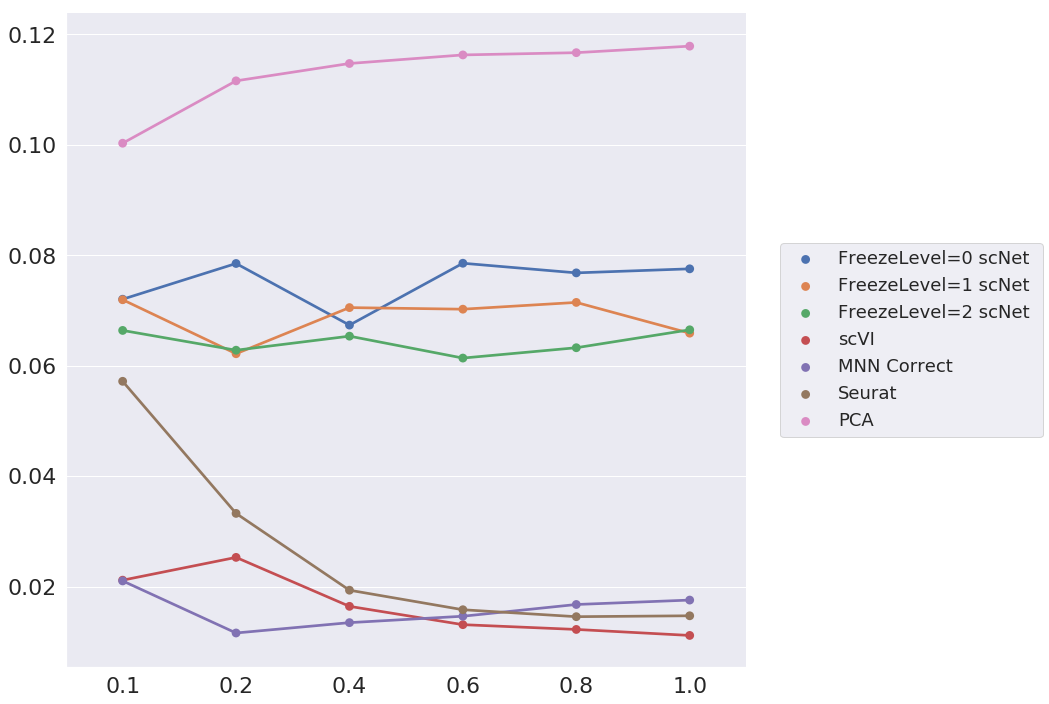

<Figure size 864x720 with 0 Axes>

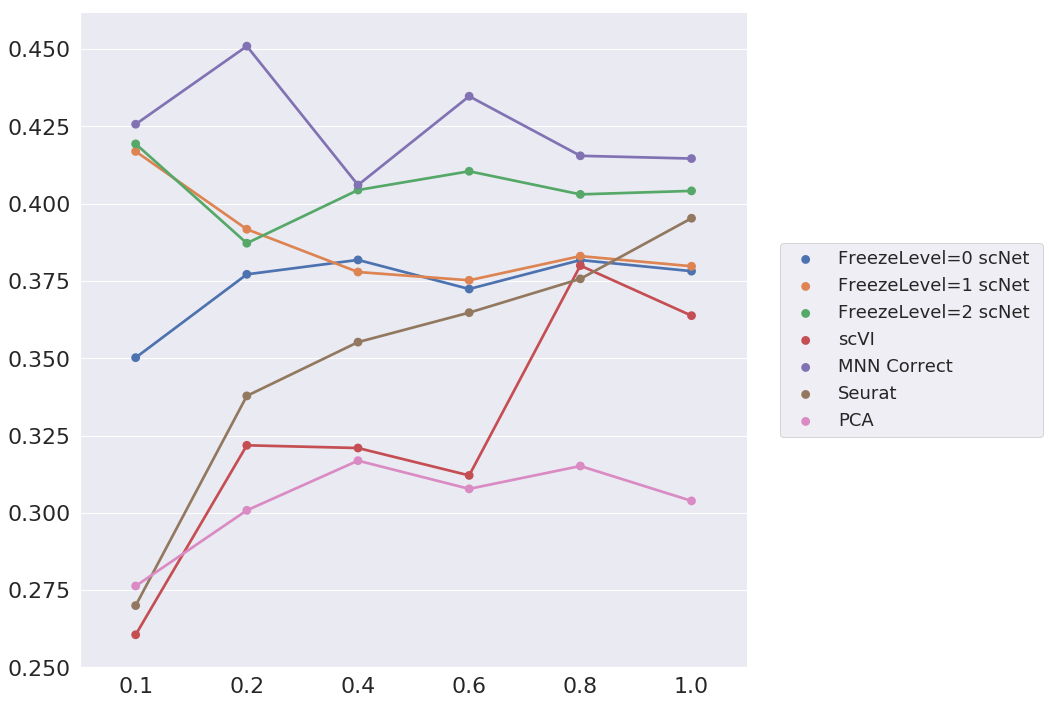

<Figure size 864x720 with 0 Axes>

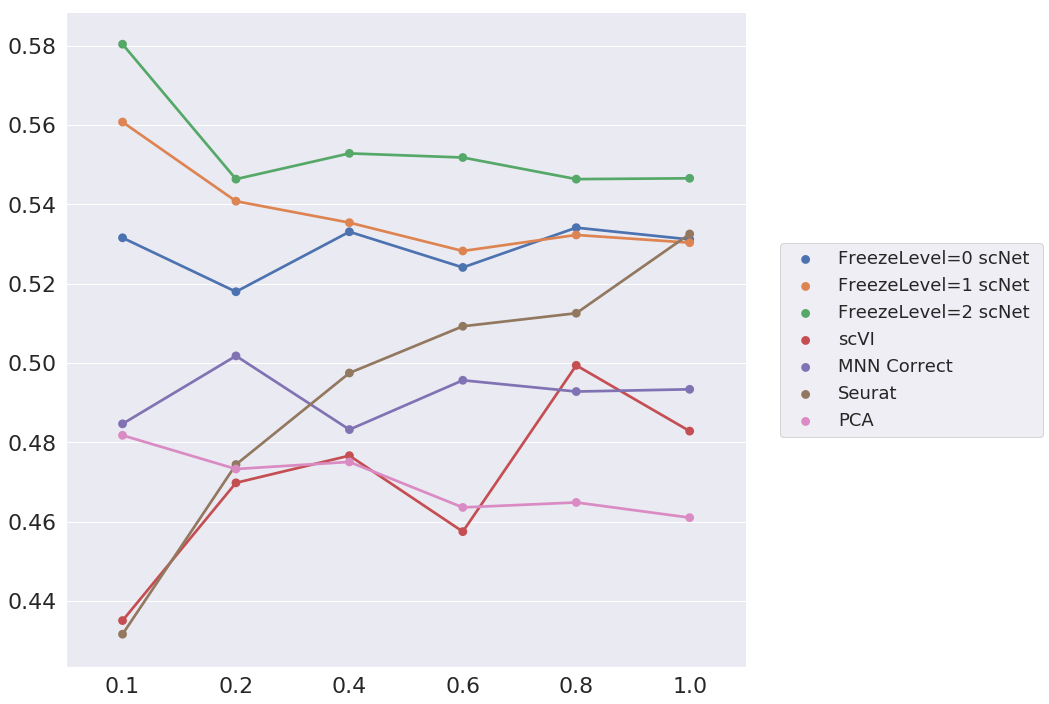

<Figure size 864x720 with 0 Axes>

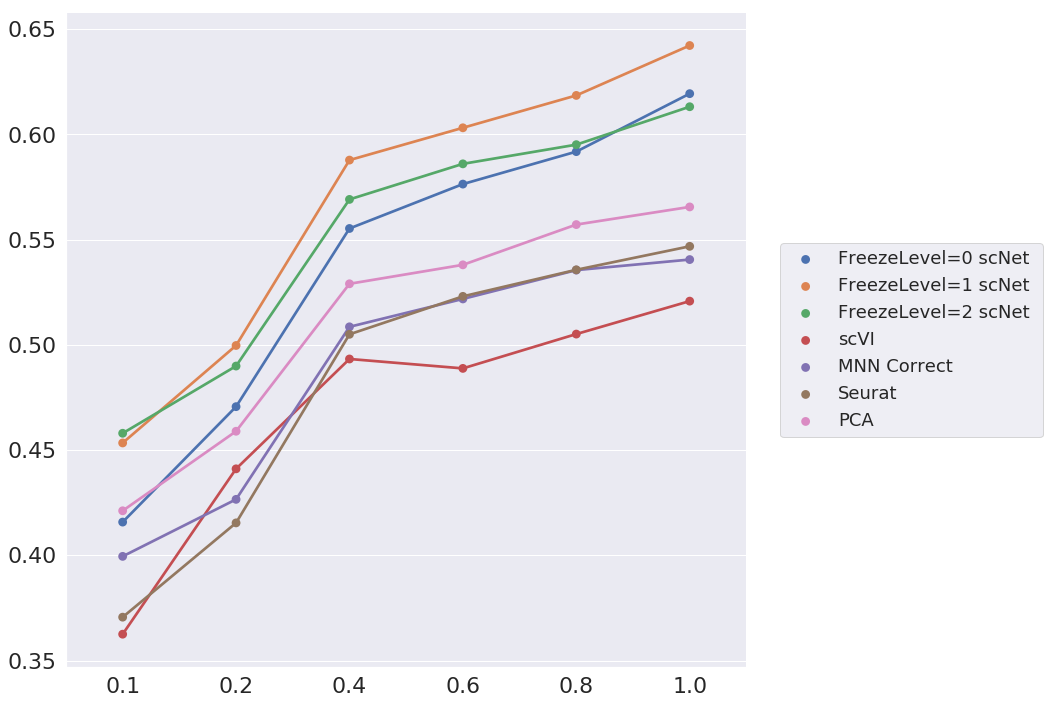

<Figure size 864x720 with 0 Axes>

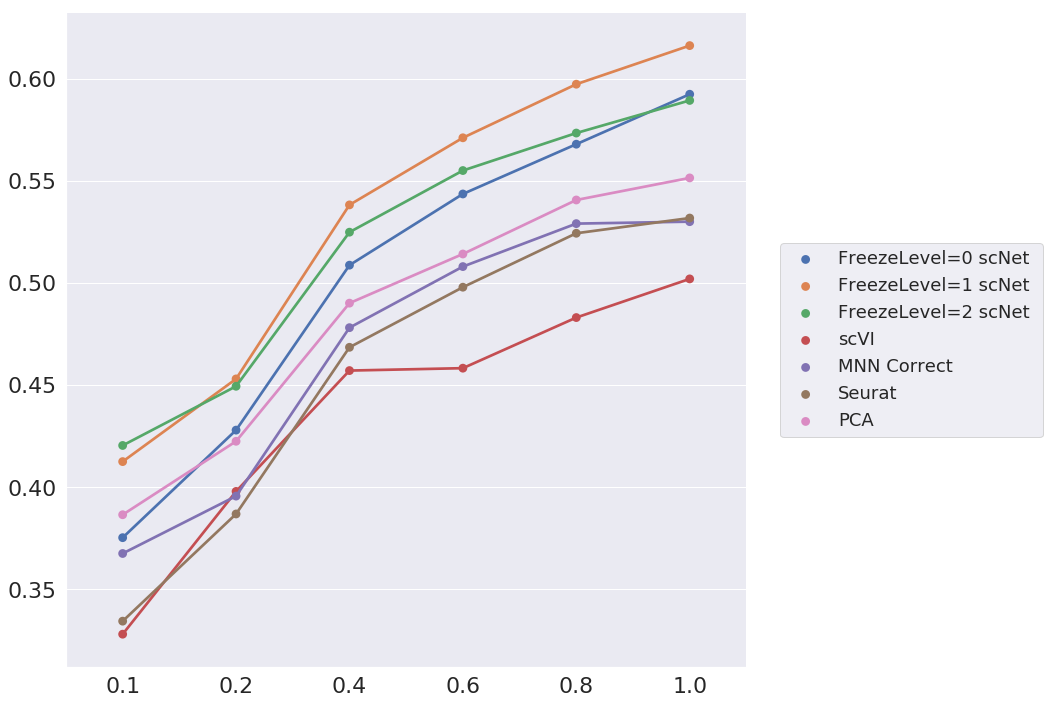

<Figure size 864x720 with 0 Axes>

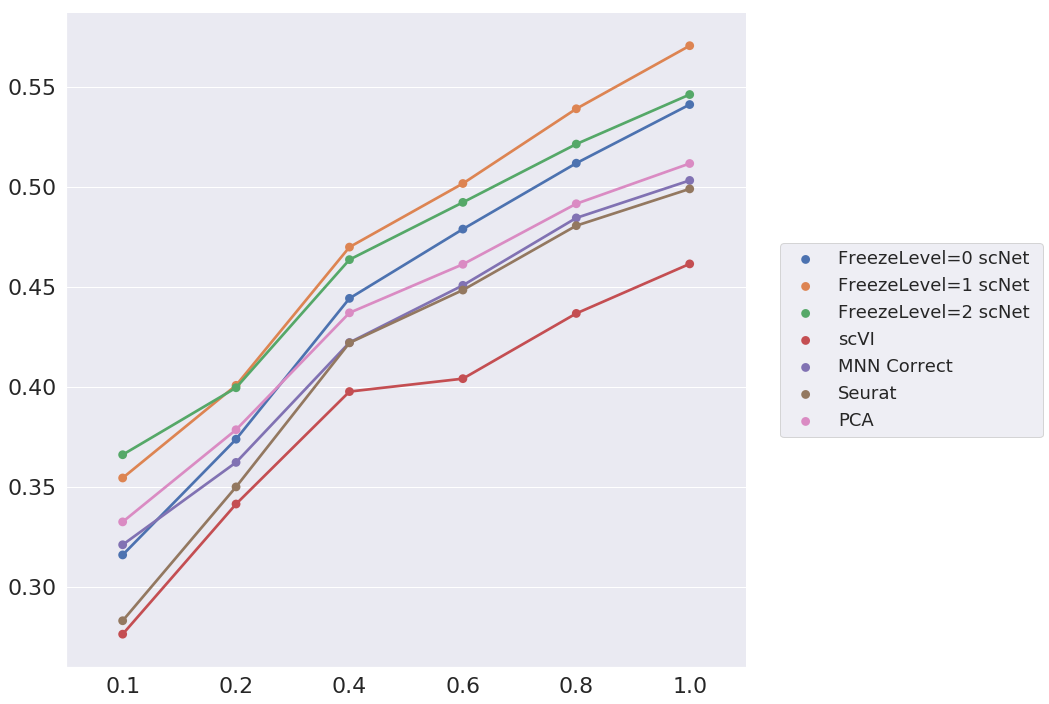

<Figure size 864x720 with 0 Axes>

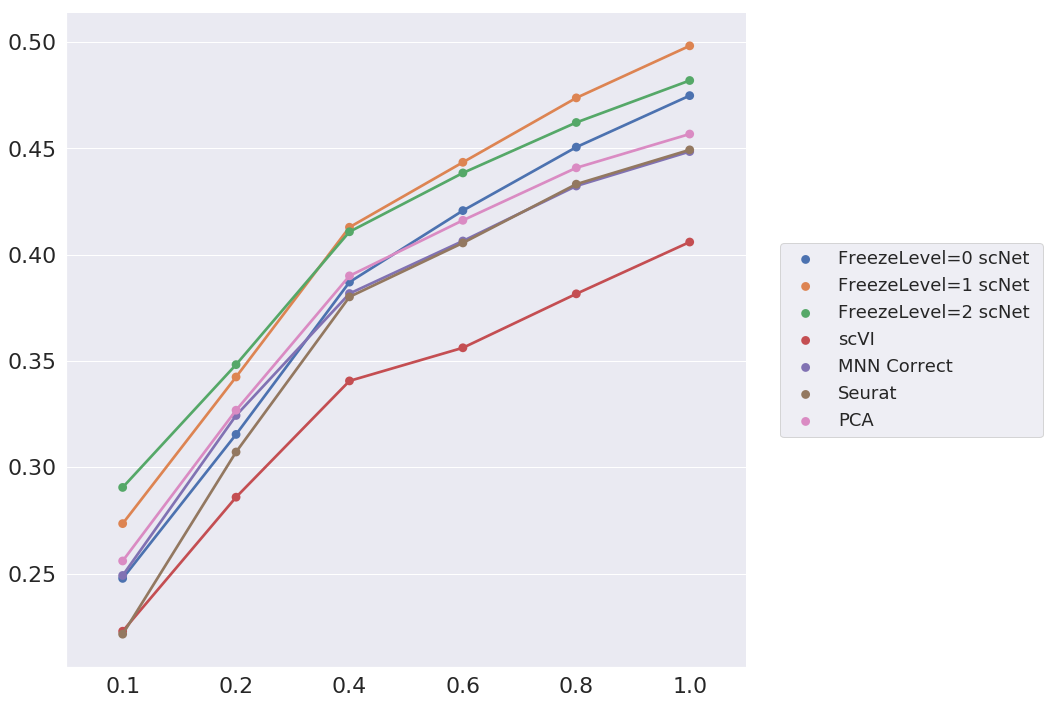

<Figure size 864x720 with 0 Axes>

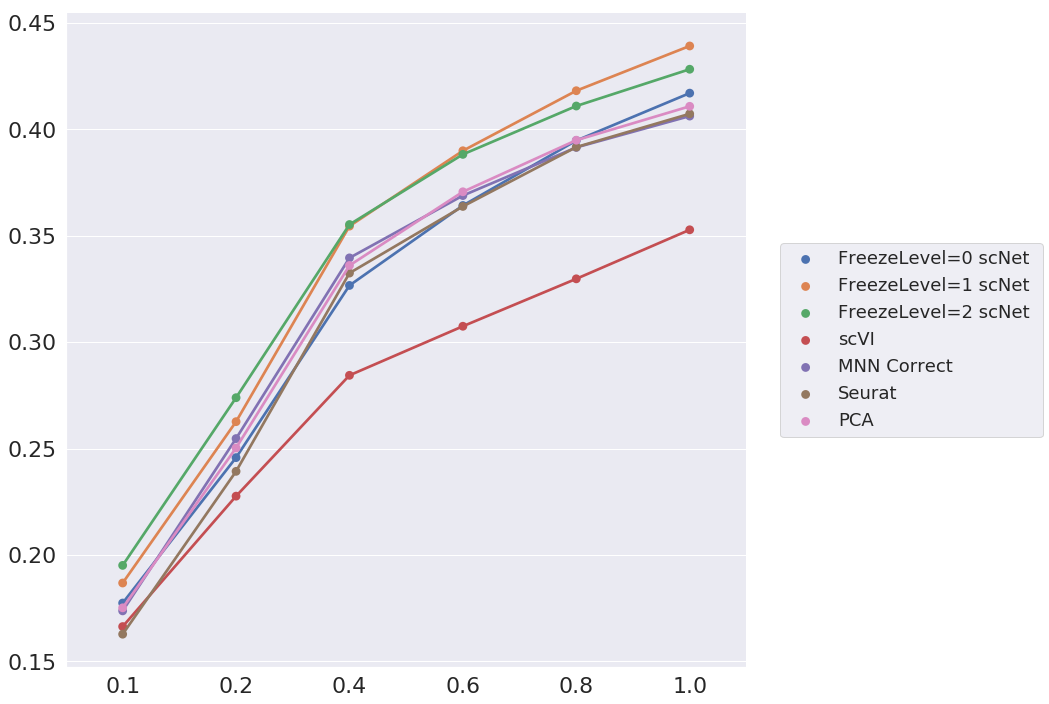

<Figure size 864x720 with 0 Axes>

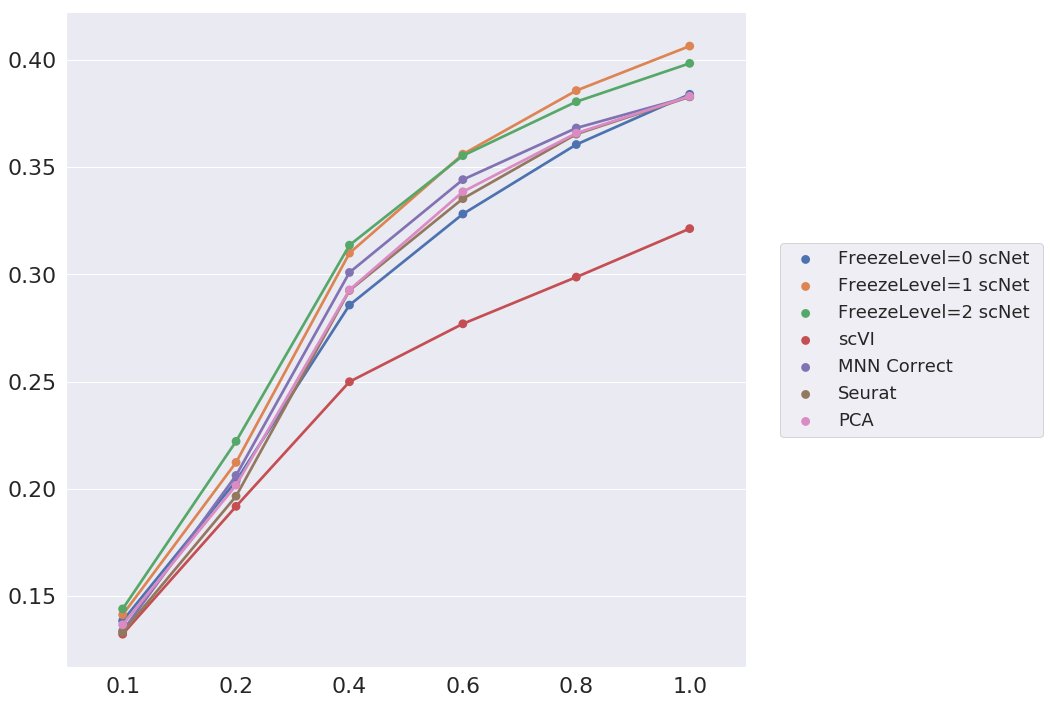

<Figure size 864x720 with 0 Axes>

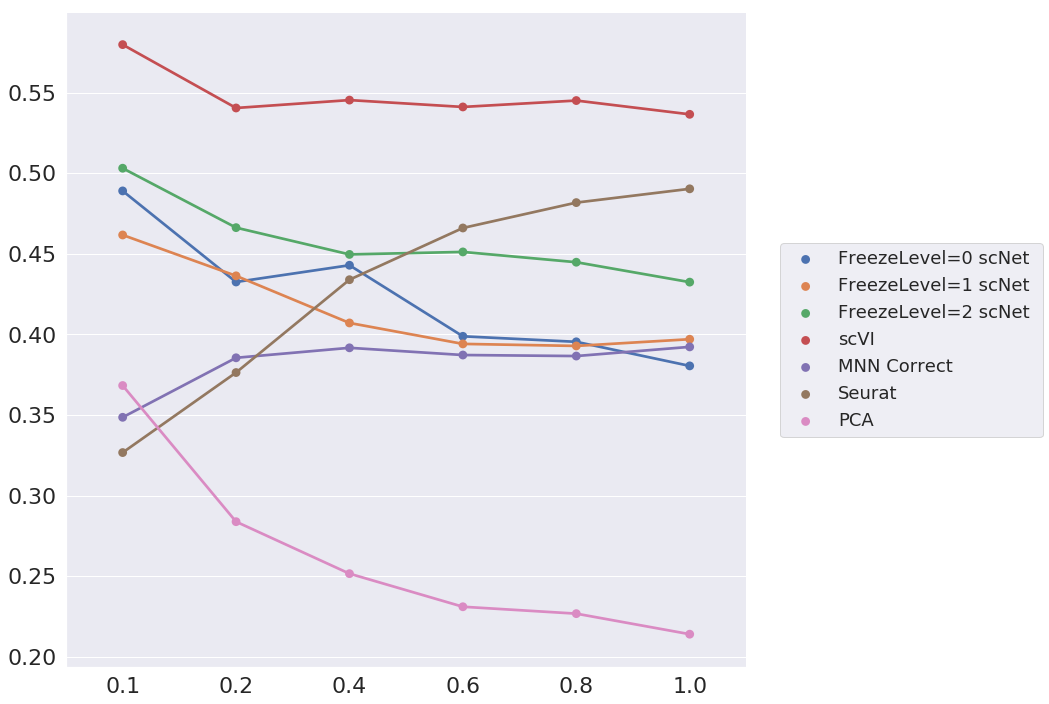

<Figure size 864x720 with 0 Axes>

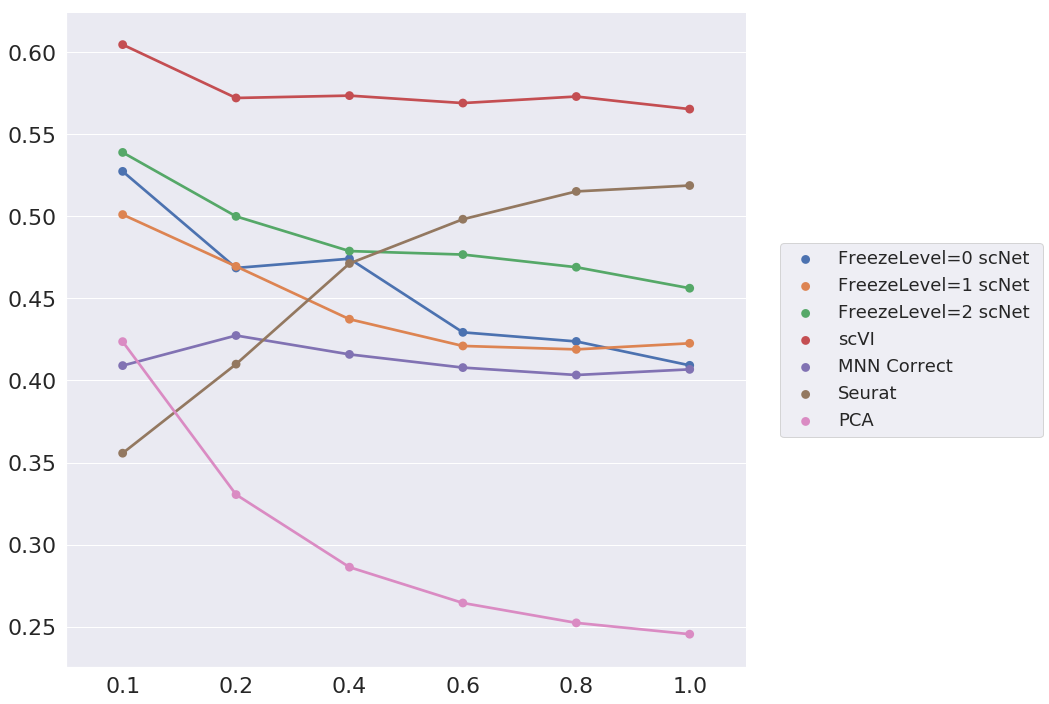

<Figure size 864x720 with 0 Axes>

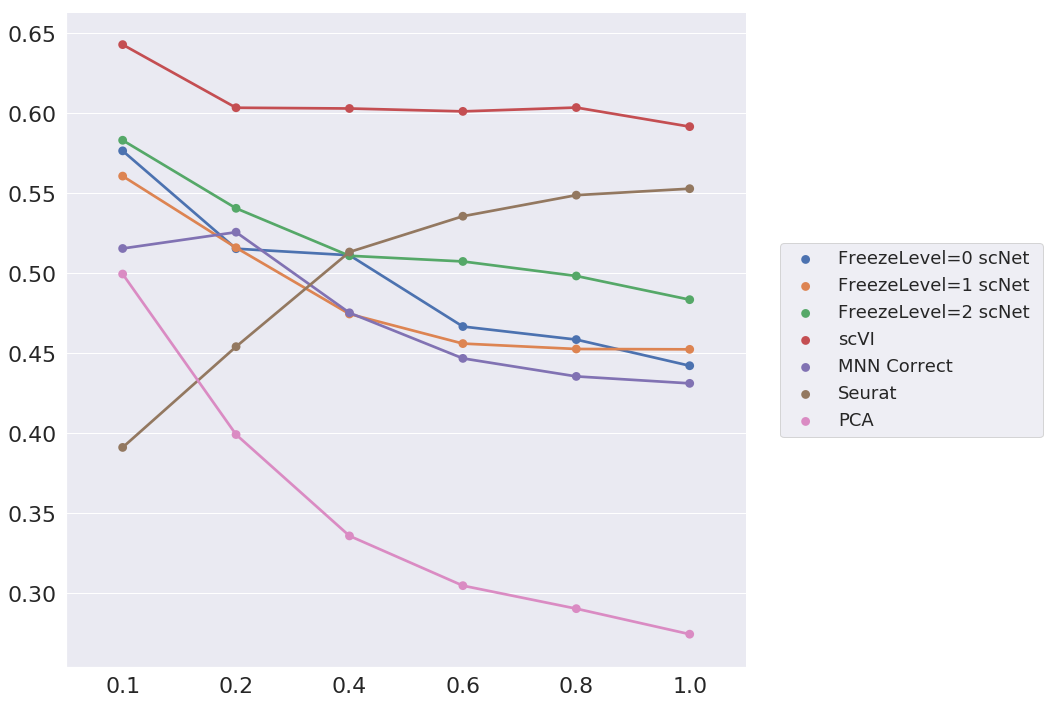

<Figure size 864x720 with 0 Axes>

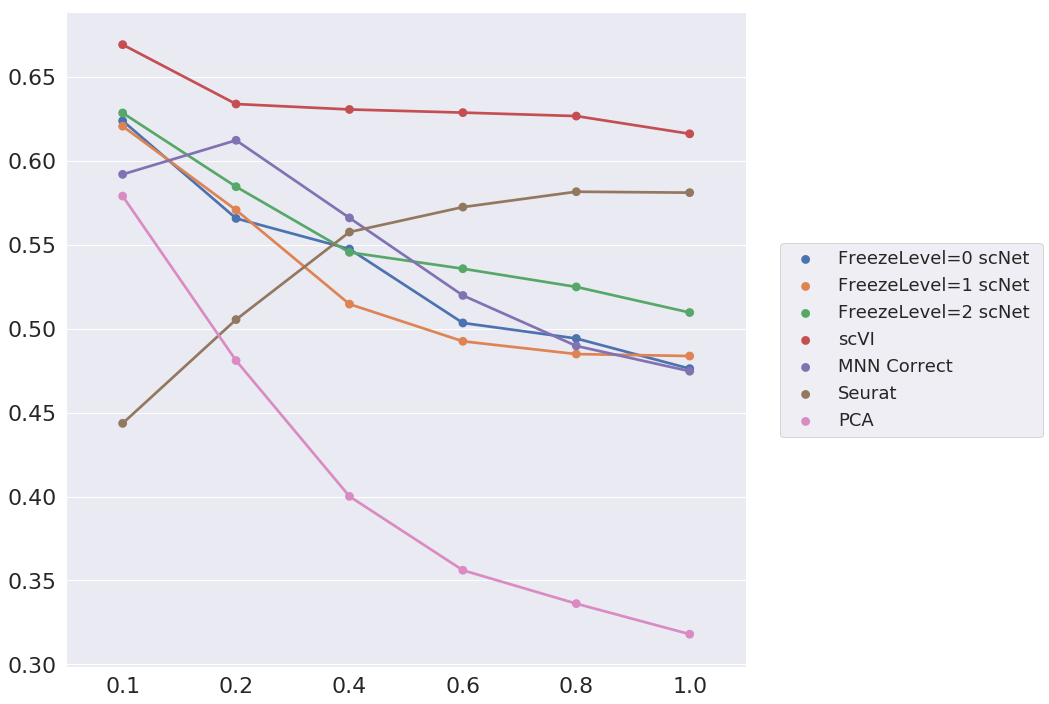

<Figure size 864x720 with 0 Axes>

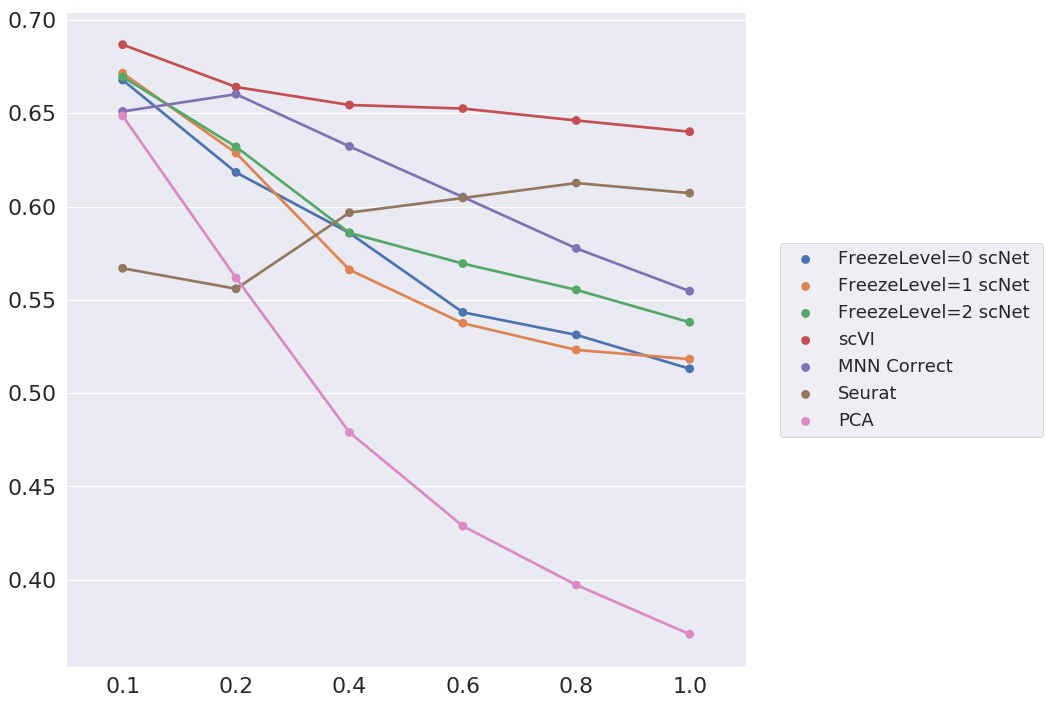

<Figure size 864x720 with 0 Axes>

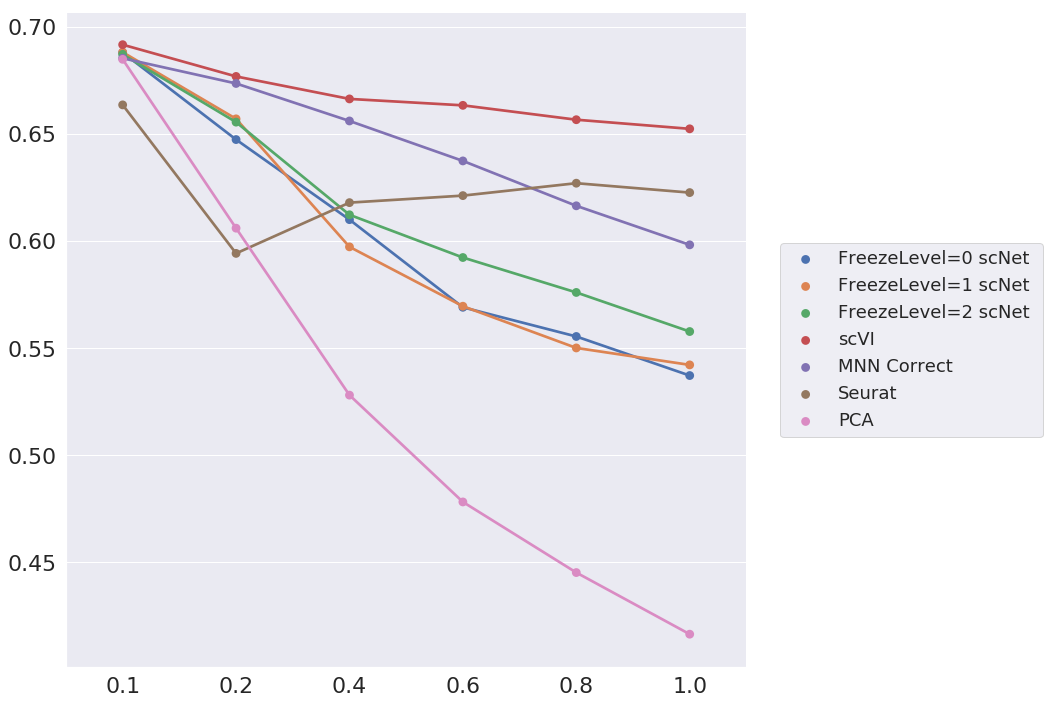

In [116]:
for score in plot_columns:
    plt.close("all")
    plt.figure(figsize=(12, 10))
    g = sns.catplot(x="subsample fraction", y=score, hue="Architecture", kind="point", 
                    data=results_df, legend=False,
                    height=10, aspect=1.5)
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.tight_layout()
    plt.savefig(f"./results/subsample/{data_name}/{score}_mmd.pdf", dpi=300)
    plt.show()
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 0.5)